# Dataset exploration

In [1]:
#imports
import sys
sys.path.append('/home/elenaruiz/Documents/FNC')
import pandas as pd
import numpy as np
from src.utils import io
from src.fake_news_detector.core.nlp import clean_text as ct

### Import original dataset

In [2]:
articles = io.read_json_file('/home/elenaruiz/Documents/FNC/src/data/tmp.json')
df = pd.DataFrame(data=articles['articles'])

### Import classified content dataset

In [3]:
articles = io.read_json_file('/home/elenaruiz/Documents/FNC/src/data/dataset_content.json')
df_content = pd.DataFrame(data=articles['articles'])

## Exploration

El dataset original contiene los siguientes datos:
- Fake: True si es fake, False si es real.
- Subtitle: Texto plano del subtitulo
- Text: El cuerpo del articulo, divido en una lista de string por párrafos
- Title: Texto plano del titulo
- URL: URl de la fuente.

In [4]:
df.head()

,fake,subtitle,text,title,url
0,True,The finding has made speculate to internationa...,[The Thai police have clarified to the middle ...,They find a corpse in a vegetarian restaurant ...,https://www.lavanguardia.com/comer/al-dia/2018...
1,True,A spokesman for the Swiss government clarifies...,"[The Swiss government has said Tuesday that ""a...",Switzerland warns that it will not authorize a...,https://www.lavanguardia.com/politica/20180220...
2,True,may not be used in schools,"[The Government of Navarra, within the Skolae ...","Navarre censors Songs of Amaral, Shakira and t...",https://www.marca.com/tiramillas/musica/2018/1...
3,True,Now the truth has been discovered,[Carmen Jiménez told her family and friends 28...,A woman pretends to be blind for 28 years not ...,http://www.marca.com/tiramillas/actualidad/201...
4,True,He recognized his actions after a discussion,"[Lewis Williams, a worker at an engineering fi...",Arrested for ejaculating at her boss's coffee ...,http://www.marca.com/tiramillas/actualidad/201...


In [5]:
df_content.head()

,adjective_words,common_noun_words,conjunction_words,fake,negative_words,noun_phrases_words,positive_words,subject,title_adjective_words,title_common_noun_words,title_conjunction_words,title_negative_words,title_noun_phrases_words,title_positive_words,title_subject
0,"[vegetarian, international, human, middle, ope...","[corpse, restaurant, Bangkok, find, speculate,...","[but, and]",True,"[corpse, kill, fire, complain, deny, victim, v...","[corpse, vegetarian restaurant, Bangkok, find,...",[like],None,[vegetarian],"[corpse, restaurant, Bangkok]",[],[corpse],"[corpse, vegetarian restaurant, Bangkok]",[],[they]
1,"[political, Swiss, legal, eventual, underline,...","[switzerland, warn, extradition, crimes, A, sp...","[or, and, but]",True,"[no, stress, offences, offences, accuse, argue...","[switzerland warn, extradition, political crim...","[Justice, like, Supreme, fair, perfectly]",None,[political],"[switzerland, warn, extradition, crimes]",[],[],"[switzerland warn, extradition, political crimes]",[],[switzerland]
2,"[navarre, educational, several, great, last, f...","[censor, Songs, Amaral, Shakira, song, Madman,...","[and, but, or]",True,"[censor, violence, ban, bad, fight, shit]","[navarre censor Songs, Amaral Shakira, song, M...","[promote, great, hope, promote, like, affectio...",None,[navarre],"[censor, Songs, Amaral, Shakira, song, Madman,...",[and],[censor],"[navarre censor Songs, Amaral Shakira, song, M...",[],[navarre]
3,"[Spanish, i, social, pose, many, hard, whole, ...","[woman, pretend, years, people, truth, Carmen,...",[and],True,"[blind, blind, injury, blind, avoid]","[woman pretend, years, people, truth, Carmen J...","[greet, truth, friends, truth, greet, justice]",None,[],"[woman, pretend, years, people]",[],[blind],"[woman pretend, years, people]",[greet],"[a, woman]"
4,"[last, past, despicable, strong, superior, ass...","[ejaculate, boss, coffee, years, action, discu...","[four, and]",True,"[arrested, detain, arrest, prison, abuse]","[ejaculate, boss coffee, years, action, discus...","[United, strong, superior, proud]",None,[last],"[ejaculate, boss, coffee, years]",[four],[arrested],"[ejaculate, boss coffee, years]",[],[]


Split by class

In [6]:
#ORIGINAL DATASET
fake_df = df.loc[df['fake'] == 1]
real_df = df.loc[df['fake'] == 0]

#CONTENT DATASET
fake_df_content = df_content.loc[df['fake'] == 1]
real_df_content = df_content.loc[df['fake'] == 0]

print('FAKE NEWS:', len(fake_df), ' ', len(fake_df)*100/len(df), '%')
print('REAL NEWS:', len(real_df), ' ', len(real_df)*100/len(df), '%')

FAKE NEWS: 56   55.445544554455445 %
REAL NEWS: 45   44.554455445544555 %


In [7]:
from src.fake_news_detector.core.data_process import word_frequency as wf

# TOKENIZE TITLE
def tokenize_colunm_of_text(dataset, label, stopwords):
    list_tokens = []
    for _, row in dataset.iterrows():
        tokens = ct.clean_text_by_word(row[label], stopwords)
        list_tokens.append(tokens)
    return list_tokens

def tokenize_colunm_of_text_list(dataset, label, stopwords):
    list_tokens = []
    for _, row in dataset.iterrows():
        tokens = []
        for paragraph in row[label]:
            tokens += ct.clean_text_by_word(paragraph, stopwords)
        list_tokens.append(tokens)
    return list_tokens

## Title exploration
### Word frequency

In [8]:
print('All text')
titles_tokens = tokenize_colunm_of_text(df, 'title', True)
freqDist_one = wf.get_word_freq(titles_tokens, True, topn=10)

print('Real news')
titles_tokens = tokenize_colunm_of_text(real_df, 'title', True)
freqDist_two = wf.get_word_freq(titles_tokens, True, topn=10)

print('Fake news')
titles_tokens = tokenize_colunm_of_text(fake_df, 'title', True)
freqDist_three = wf.get_word_freq(titles_tokens, True, topn=10)

All text
Number of unique words:  621
Top 10 words:
[('Spain', 8), ('new', 5), ('ask', 4), ('Spanish', 4), ('refuse', 4), ('first', 4), ('government', 3), ('ban', 3), ('immigrants', 3), ('children', 3)]
Real news
Number of unique words:  282
Top 10 words:
[('first', 4), ('new', 3), ('Abascal', 2), ('two', 2), ('grow', 2), ('space', 2), ('Congress', 2), ('ask', 2), ('price', 2), ('plan', 2)]
Fake news
Number of unique words:  371
Top 10 words:
[('Spain', 6), ('ban', 3), ('Spanish', 3), ('children', 3), ('refuse', 3), ('authorize', 2), ('woman', 2), ('years', 2), ('government', 2), ('father', 2)]


In [9]:
wf.pert_of_difference(freqDist_two, freqDist_three, 200)

0.03626943005181347

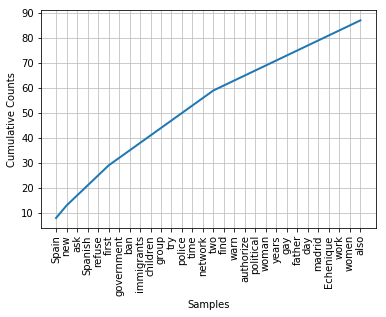

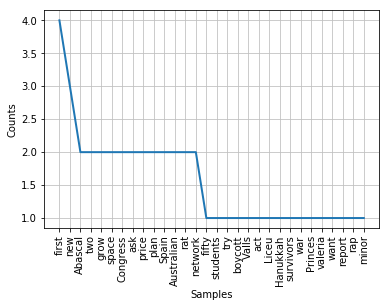

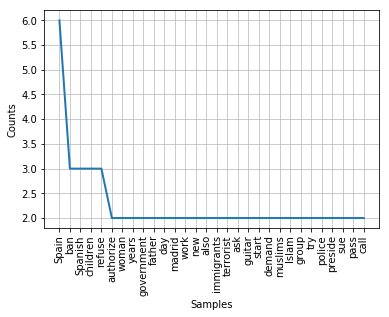

In [10]:
freqDist_one.plot(30,cumulative=True)
freqDist_two.plot(30,cumulative=False)
freqDist_three.plot(30,cumulative=False)

## Text exploration
### Word frequency

In [11]:
print('All text')
titles_tokens = tokenize_colunm_of_text_list(df, 'text', True)
freqDist_one = wf.get_word_freq(titles_tokens, True, topn=10)

print('Real news')
titles_tokens = tokenize_colunm_of_text_list(real_df, 'text', True)
freqDist_two = wf.get_word_freq(titles_tokens, True, topn=10)

print('Fake news')
titles_tokens = tokenize_colunm_of_text_list(fake_df, 'text', True)
freqDist_three = wf.get_word_freq(titles_tokens, True, topn=10)

All text
Number of unique words:  5370
Top 10 words:
[('one', 114), ('say', 92), ('also', 81), ('Spanish', 58), ('take', 58), ('time', 57), ('years', 55), ('make', 54), ('use', 53), ('Spain', 52)]
Real news
Number of unique words:  3528
Top 10 words:
[('one', 59), ('say', 51), ('also', 44), ('make', 37), ('years', 34), ('time', 30), ('euros', 29), ('people', 28), ('European', 27), ('go', 26)]
Fake news
Number of unique words:  3268
Top 10 words:
[('one', 55), ('say', 41), ('Spanish', 40), ('also', 37), ('Spain', 33), ('take', 32), ('use', 31), ('police', 28), ('time', 27), ('case', 27)]


In [12]:
wf.pert_of_difference(freqDist_two, freqDist_three, 300)

0.30718954248366015

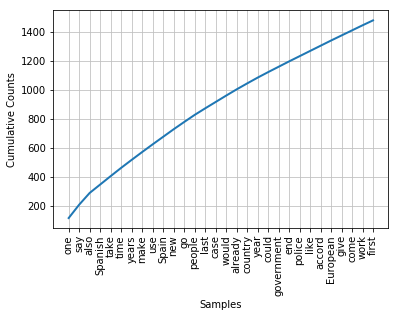

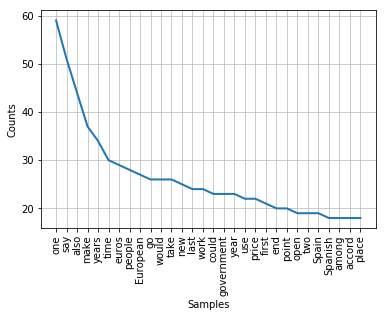

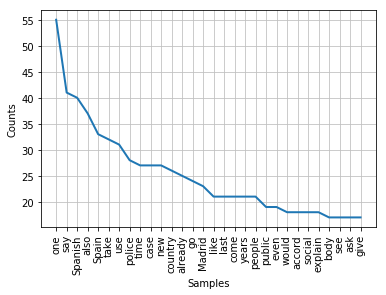

In [13]:
freqDist_one.plot(30,cumulative=True)
freqDist_two.plot(30,cumulative=False)
freqDist_three.plot(30,cumulative=False)

## Positive words exploration
### Word frequency

In [14]:
print('All text')
titles_tokens = tokenize_colunm_of_text_list(df_content, 'positive_words', True)
freqDist_one = wf.get_word_freq(titles_tokens, True, topn=10)

print('Real news')
titles_tokens = tokenize_colunm_of_text_list(real_df_content, 'positive_words', True)
freqDist_two = wf.get_word_freq(titles_tokens, True, topn=10)

print('Fake news')
titles_tokens = tokenize_colunm_of_text_list(fake_df_content, 'positive_words', True)
freqDist_three = wf.get_word_freq(titles_tokens, True, topn=10)

All text
Number of unique words:  290
Top 10 words:
[('like', 38), ('party', 31), ('free', 19), ('increase', 19), ('create', 18), ('security', 18), ('great', 17), ('united', 17), ('best', 17), ('support', 16)]
Real news
Number of unique words:  205
Top 10 words:
[('party', 20), ('like', 16), ('best', 16), ('united', 13), ('great', 12), ('increase', 12), ('agreement', 11), ('well', 9), ('share', 9), ('play', 8)]
Fake news
Number of unique words:  186
Top 10 words:
[('like', 22), ('security', 16), ('free', 14), ('support', 13), ('hand', 13), ('create', 12), ('party', 11), ('strong', 8), ('commit', 8), ('good', 8)]


In [15]:
wf.pert_of_difference(freqDist_two, freqDist_three, 75)

0.3761467889908257

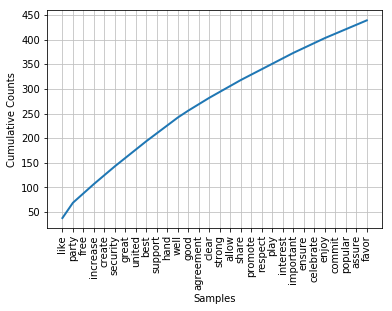

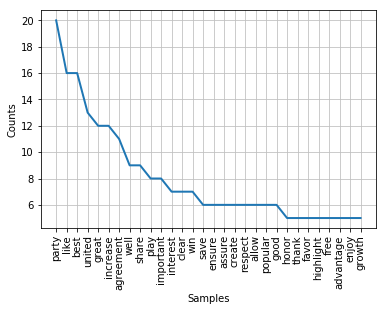

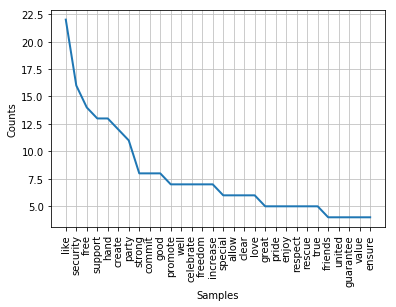

In [16]:
freqDist_one.plot(30,cumulative=True)
freqDist_two.plot(30,cumulative=False)
freqDist_three.plot(30,cumulative=False)

## Negative words exploration
### Word frequency

In [17]:
print('All text')
titles_tokens = tokenize_colunm_of_text_list(df_content, 'negative_words', True)
freqDist_one = wf.get_word_freq(titles_tokens, True, topn=10)

print('Real news')
titles_tokens = tokenize_colunm_of_text_list(real_df_content, 'negative_words', True)
freqDist_two = wf.get_word_freq(titles_tokens, True, topn=10)

print('Fake news')
titles_tokens = tokenize_colunm_of_text_list(fake_df_content, 'negative_words', True)
freqDist_three = wf.get_word_freq(titles_tokens, True, topn=10)

All text
Number of unique words:  310
Top 10 words:
[('attack', 26), ('stop', 15), ('fight', 14), ('kill', 13), ('death', 13), ('suffer', 12), ('violence', 12), ('war', 12), ('die', 11), ('reject', 11)]
Real news
Number of unique words:  182
Top 10 words:
[('attack', 15), ('suffer', 9), ('murder', 8), ('death', 7), ('reject', 7), ('kill', 7), ('war', 6), ('risk', 6), ('complaint', 6), ('avoid', 6)]
Fake news
Number of unique words:  226
Top 10 words:
[('violence', 11), ('attack', 11), ('fight', 10), ('stop', 10), ('argue', 9), ('shit', 8), ('refuse', 8), ('terrorist', 8), ('die', 8), ('violent', 8)]


In [18]:
wf.pert_of_difference(freqDist_two, freqDist_three, 50)

0.26582278481012656

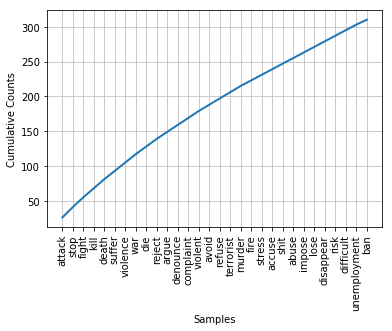

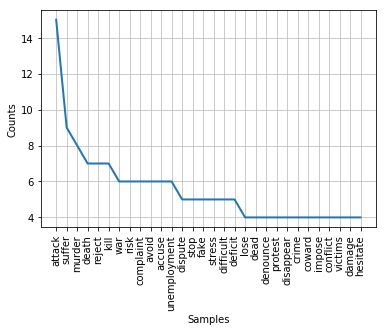

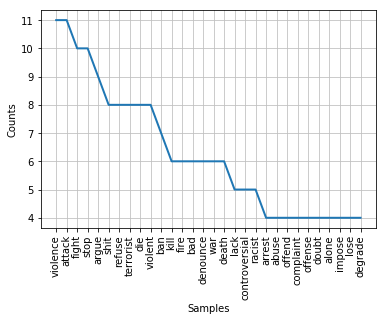

In [19]:
freqDist_one.plot(30,cumulative=True)
freqDist_two.plot(30,cumulative=False)
freqDist_three.plot(30,cumulative=False)

## Adjective words exploration
### Word frequency

In [20]:
print('All text')
titles_tokens = tokenize_colunm_of_text_list(df_content, 'adjective_words', True)
freqDist_one = wf.get_word_freq(titles_tokens, True, topn=10)

print('Real news')
titles_tokens = tokenize_colunm_of_text_list(real_df_content, 'adjective_words', True)
freqDist_two = wf.get_word_freq(titles_tokens, True, topn=10)

print('Fake news')
titles_tokens = tokenize_colunm_of_text_list(fake_df_content, 'adjective_words', True)
freqDist_three = wf.get_word_freq(titles_tokens, True, topn=10)

All text
Number of unique words:  916
Top 10 words:
[('last', 38), ('new', 29), ('spanish', 27), ('first', 24), ('social', 21), ('public', 18), ('many', 18), ('european', 17), ('next', 16), ('open', 14)]
Real news
Number of unique words:  567
Top 10 words:
[('last', 21), ('new', 16), ('first', 14), ('european', 11), ('spanish', 10), ('social', 9), ('many', 8), ('open', 8), ('great', 8), ('recent', 8)]
Fake news
Number of unique words:  562
Top 10 words:
[('last', 17), ('spanish', 17), ('public', 13), ('new', 13), ('social', 12), ('first', 10), ('many', 10), ('next', 9), ('able', 8), ('local', 8)]


In [21]:
wf.pert_of_difference(freqDist_two, freqDist_three, 200)

0.2861736334405145

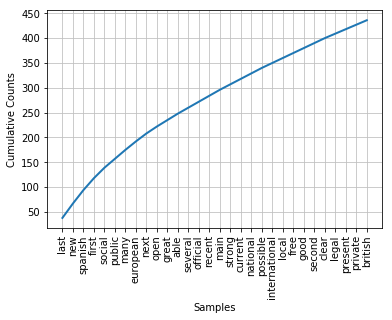

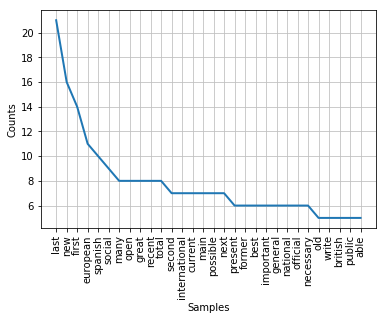

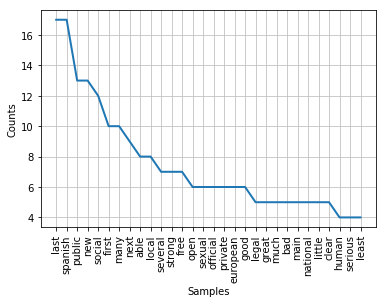

In [22]:
freqDist_one.plot(30,cumulative=True)
freqDist_two.plot(30,cumulative=False)
freqDist_three.plot(30,cumulative=False)

## Verbs words exploration
### Word frequency

In [23]:
print('All text')
titles_tokens = tokenize_colunm_of_text_list(df_content, 'noun_phrases_words', True)
freqDist_one = wf.get_word_freq(titles_tokens, True, topn=10)

print('Real news')
titles_tokens = tokenize_colunm_of_text_list(real_df_content, 'noun_phrases_words', True)
freqDist_two = wf.get_word_freq(titles_tokens, True, topn=10)

print('Fake news')
titles_tokens = tokenize_colunm_of_text_list(fake_df_content, 'noun_phrases_words', True)
freqDist_three = wf.get_word_freq(titles_tokens, True, topn=10)

All text
Number of unique words:  4665
Top 10 words:
[('time', 59), ('new', 57), ('spain', 56), ('years', 54), ('people', 53), ('government', 52), ('spanish', 45), ('case', 44), ('year', 42), ('last', 40)]
Real news
Number of unique words:  3028
Top 10 words:
[('years', 32), ('time', 31), ('people', 30), ('government', 29), ('european', 28), ('new', 27), ('first', 26), ('year', 25), ('price', 25), ('spain', 22)]
Fake news
Number of unique words:  2744
Top 10 words:
[('spain', 34), ('police', 30), ('new', 30), ('time', 28), ('spanish', 28), ('case', 26), ('madrid', 24), ('government', 23), ('people', 23), ('years', 22)]


In [24]:
wf.pert_of_difference(freqDist_two, freqDist_three, 500)

0.2562814070351759

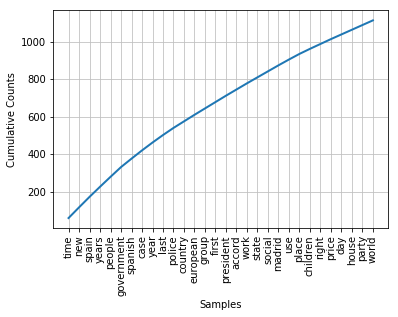

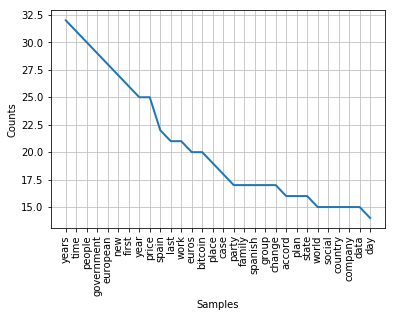

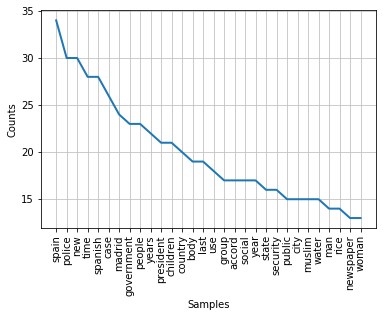

In [25]:
freqDist_one.plot(30,cumulative=True)
freqDist_two.plot(30,cumulative=False)
freqDist_three.plot(30,cumulative=False)